In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import warnings
import os
import shutil
import random
import numpy as np
from PIL import Image
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.callbacks import EarlyStopping

In [3]:
import os

def load_full_dataset(dataset_path):
    """
    Loads the full dataset and returns the paths to Parasitized and Uninfected folders.
    
    Args:
        dataset_path: Path to your unzipped dataset folder (should contain 'Parasitized' and 'Uninfected')
    
    Returns:
        dict: Dictionary with keys 'Parasitized' and 'Uninfected' pointing to their respective folder paths
    """
    print(f"📂 Loading full dataset from: {dataset_path}")
    
    parasitized_path = os.path.join(dataset_path, "Parasitized")
    uninfected_path = os.path.join(dataset_path, "Uninfected")
    
    if not os.path.exists(parasitized_path):
        print(f"❌ Path not found: {parasitized_path}")
        return None
    if not os.path.exists(uninfected_path):
        print(f"❌ Path not found: {uninfected_path}")
        return None

    parasitized_images = [f for f in os.listdir(parasitized_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    uninfected_images = [f for f in os.listdir(uninfected_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    print(f"📊 Total Parasitized Images: {len(parasitized_images)}")
    print(f"📊 Total Uninfected Images: {len(uninfected_images)}")
    
    return {
        "Parasitized": parasitized_path,
        "Uninfected": uninfected_path
    }


# Example usage
dataset_path = r"C:\Users\KevinNyiringango\SafeCell\archive (1)\cell_images"

dataset_dirs = load_full_dataset(dataset_path)

if dataset_dirs:
    print(f"\n✅ Dataset is ready.")
    print(f"📁 Parasitized folder: {dataset_dirs['Parasitized']}")
    print(f"📁 Uninfected folder: {dataset_dirs['Uninfected']}")
else:
    print("\n❌ Failed to load dataset. Please check the folder structure.")


📂 Loading full dataset from: C:\Users\KevinNyiringango\SafeCell\archive (1)\cell_images
📊 Total Parasitized Images: 13779
📊 Total Uninfected Images: 13779

✅ Dataset is ready.
📁 Parasitized folder: C:\Users\KevinNyiringango\SafeCell\archive (1)\cell_images\Parasitized
📁 Uninfected folder: C:\Users\KevinNyiringango\SafeCell\archive (1)\cell_images\Uninfected


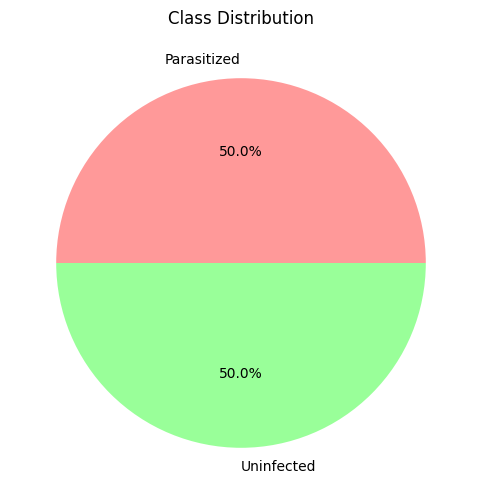

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


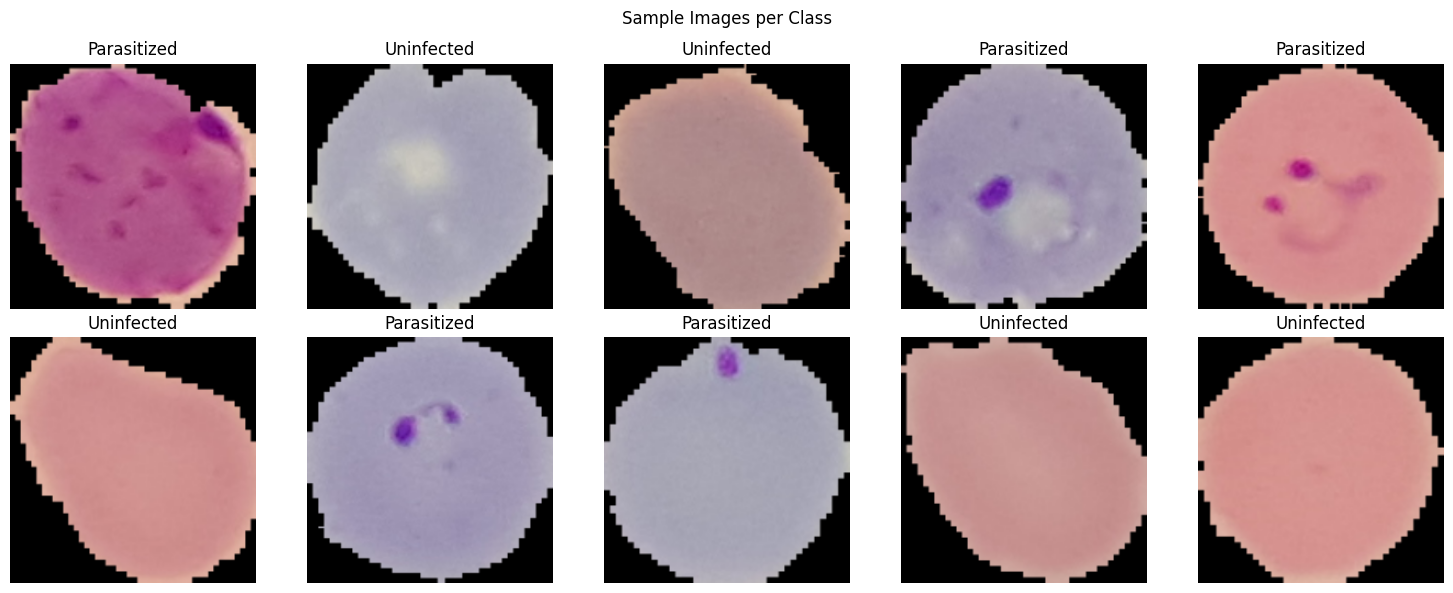

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# --- Plot class distribution from dataset folder ---
def plot_class_distribution_pie(dataset_path):
    class_folders = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    counts = [len(os.listdir(os.path.join(dataset_path, c))) for c in class_folders]
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=class_folders, autopct='%1.1f%%', colors=['#ff9999', '#99ff99'])
    plt.title("Class Distribution")
    plt.show()

# --- Visualize a few images from each class, with optional predictions ---
def visualize_sample_images_with_predictions(dataset, model=None, class_names=None, samples_per_class=5):
    plt.figure(figsize=(15, 6))
    displayed = {name: 0 for name in class_names}
    total_displayed = 0
    max_total = samples_per_class * len(class_names)

    for images, labels in dataset.unbatch():
        label = int(labels.numpy())
        class_name = class_names[label]

        if displayed[class_name] < samples_per_class:
            plt.subplot(len(class_names), samples_per_class, total_displayed + 1)
            img = images.numpy().astype("uint8")
            plt.imshow(img)

            title = class_name
            if model:
                pred_probs = model.predict(tf.expand_dims(images, axis=0), verbose=0)
                pred_label = class_names[np.argmax(pred_probs)]
                title = f"True: {class_name}\nPred: {pred_label}"

            plt.title(title)
            plt.axis("off")
            displayed[class_name] += 1
            total_displayed += 1

        if total_displayed >= max_total:
            break

    plt.suptitle("Sample Images with Predictions" if model else "Sample Images per Class")
    plt.tight_layout()
    plt.show()


# --- Main usage ---
dataset_path = r"C:\Users\KevinNyiringango\SafeCell\archive (1)\cell_images"

# Plot distribution from folder
plot_class_distribution_pie(dataset_path)

# Load dataset
train_ds = keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

# Get class names dynamically
class_names = train_ds.class_names

# Visualize samples
visualize_sample_images_with_predictions(train_ds, class_names=class_names)


In [5]:



from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)


warnings.filterwarnings('ignore')


from keras import models, layers


def create_cnn_model(input_shape=(224, 224, 3), num_classes=2):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


model = create_cnn_model()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.
Classes: ['Parasitized', 'Uninfected']
Creating regularized model...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 133s 126ms/step - accuracy: 0.5660 - loss: 0.7366 - val_accuracy: 0.8844 - val_loss: 0.4255
Epoch 2/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 78s 113ms/step - accuracy: 0.8759 - loss: 0.3966 - val_accuracy: 0.9227 - val_loss: 0.2909
Epoch 3/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 74s 107ms/step - accuracy: 0.9208 - loss: 0.3193 - val_accuracy: 0.9445 - val_loss: 0.2193
Epoch 4/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 77s 111ms/step - accuracy: 0.9368 - loss: 0.2553 - val_accuracy: 0.9425 - val_loss: 0.2156
Epoch 5/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 116s 168ms/step - accuracy: 0.9390 - loss: 0.2391 - val_accuracy: 0.9521 - val_loss: 0.1899
Epoch 6/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 75s 109ms/step - accuracy: 0.9383 - loss: 0.2323 - val_accuracy: 0.9476 - val_loss: 0.1854
Epoch 7/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 70s 102ms/step - accuracy: 0.9425 - loss: 0.2177 - val_accuracy: 0.9514 - val_loss: 0.1824
Epoch 8/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 69s 100ms/step - accura

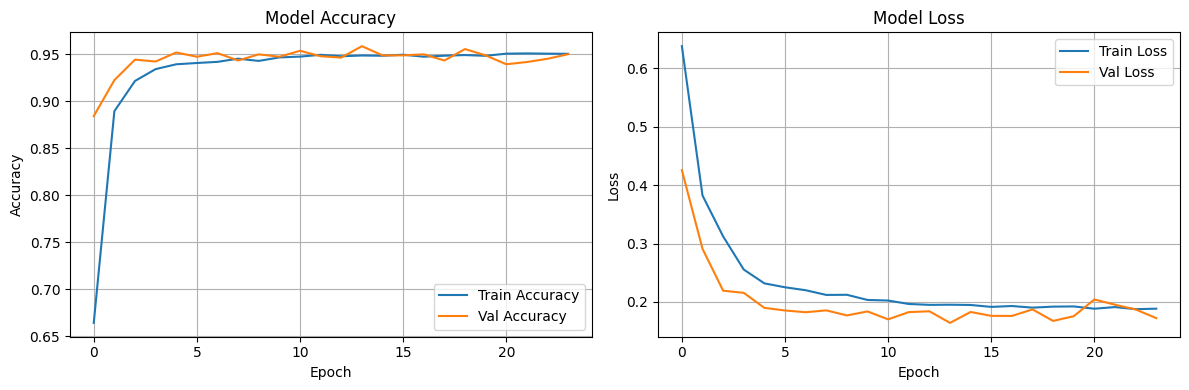


Training Set Distribution:

Class Distribution:
  Parasitized: 11062 samples (50.2%)
  Uninfected: 10985 samples (49.8%)

Validation Set Distribution:

Class Distribution:
  Parasitized: 2717 samples (49.3%)
  Uninfected: 2794 samples (50.7%)


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers
from keras.callbacks import EarlyStopping
os.makedirs("saved_models", exist_ok=True)
# --- CONFIGURATION ---
dataset_path = r"C:\Users\KevinNyiringango\SafeCell\archive (1)\cell_images"
image_size = (128, 128)
batch_size = 32

# --- Load Datasets ---
train_dataset = keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode='int'
)

val_dataset = keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode='int'
)

class_names = train_dataset.class_names
print(f"Classes: {class_names}")

# --- Preprocessing ---
def preprocess_data(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
val_dataset = val_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# --- Data Augmentation Layer ---
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# --- Define Model with L2 Regularization and smaller size ---
def create_regularized_model(input_shape=(128, 128, 3), num_classes=2):
    weight_decay = 1e-4
    model = models.Sequential([
        data_augmentation,

        layers.Conv2D(16, (3, 3), activation='relu', 
                      kernel_regularizer=regularizers.l2(weight_decay),
                      input_shape=input_shape),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(32, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(weight_decay)),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(weight_decay)),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(64, activation='relu',
                     kernel_regularizer=regularizers.l2(weight_decay)),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# --- Train Model ---
print("Creating regularized model...")
regularized_model = create_regularized_model()
regularized_model.summary()

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

print("Training model...")
history = regularized_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[early_stop],
    verbose=1
)

# --- Evaluation ---
val_loss, val_acc = regularized_model.evaluate(val_dataset, verbose=0)
print(f"\n✅ Validation Accuracy: {val_acc:.4f} ({val_acc * 100:.2f}%)")
print(f"📉 Validation Loss: {val_loss:.4f}")

# --- Plot Training History ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Class Distribution ---
def check_class_distribution(dataset, class_names):
    class_counts = {name: 0 for name in class_names}
    total_samples = 0

    for _, labels in dataset:
        for label in labels:
            class_counts[class_names[label.numpy()]] += 1
            total_samples += 1

    print(f"\nClass Distribution:")
    for class_name, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f"  {class_name}: {count} samples ({percentage:.1f}%)")

    return class_counts

print("\nTraining Set Distribution:")
train_dist = check_class_distribution(train_dataset, class_names)

print("\nValidation Set Distribution:")
val_dist = check_class_distribution(val_dataset, class_names)


In [13]:
regularized_model.save("saved_models/malaria_model.h5")
print("✅ Model saved as 'malaria_model.h5'")


✅ Model saved as 'malaria_model.h5'


In [14]:
simple_model = keras.models.load_model("saved_models/malaria_model.h5")


FileUpload(value=(), accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step

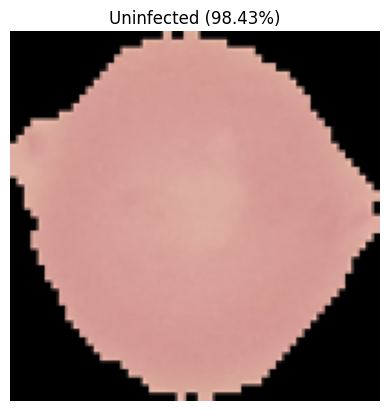

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

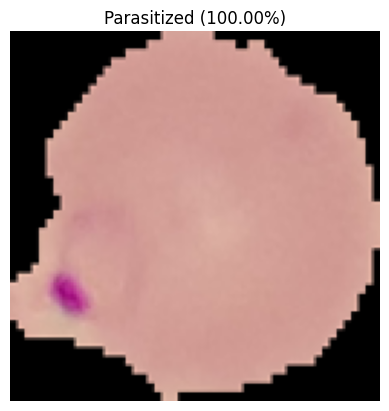

In [2]:
from tensorflow import keras
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

# Load model and class names
simple_model = keras.models.load_model("saved_models/malaria_model.h5")
class_names = ['Parasitized', 'Uninfected']

upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

def on_upload_change(change):
    if upload_widget.value:
        uploaded_file = upload_widget.value[0]
        img = Image.open(io.BytesIO(uploaded_file['content'])).convert("RGB")
        img = img.resize((128, 128))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        preds = simple_model.predict(img_array)
        pred_class_idx = np.argmax(preds, axis=1)[0]
        pred_class_name = class_names[pred_class_idx]
        confidence = preds[0][pred_class_idx]

        # Debug
        print(f"Predictions: {preds}, Class index: {pred_class_idx}, Class: {pred_class_name}")

        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{pred_class_name} ({confidence:.2%})")
        plt.show()

upload_widget.observe(on_upload_change, names='value')
display(upload_widget)
